In [ ]:
import sys
print(sys.path)


In [ ]:
sys.path.insert(0, r'C:\Users\nicol\source\repos\MC-QFin\out\build\x64-Debug\python_interface')
print(sys.path)

In [ ]:
import qfin

In [ ]:
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
import matplotlib.pyplot as plt

In [ ]:
def euro_vanilla_call(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

In [30]:
T = 1
K = 1
r = 0.02
sigma = 0.2
S = 1
analresult = euro_vanilla_call(S, K, T, r, sigma)
print(analresult)

0.08916037278572536


In [31]:
seed = 1
dt = 0.2
n = np.linspace(10, 1000, 10)
results = []
for nmc in [int(x) for x in n ]:
    mcresult = qfin.black_scholes_mc(S, K, T, r, sigma, seed, dt, nmc)
    results.append(mcresult[0])

print(results)

[0.054880792286472246, 0.094057967436028, 0.10900936784935451, 0.10783308340414545, 0.10314946715976404, 0.10314333859195285, 0.09944381271908488, 0.10005458867096095, 0.09692078116459109, 0.09734148619515522]


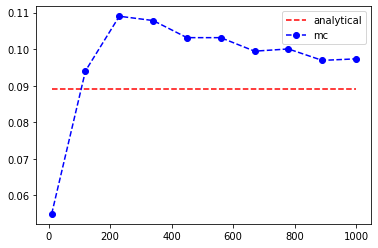

In [32]:
plt.plot(n,[analresult for x in n], 'r--', label = 'analytical')
plt.plot(n, results, 'ob--', label = 'mc')
plt.legend()